NAME: MOHAMAD MIRZA AIMAN BIN ZULKIPLE
STUDENT ID: 52224121157

ASSIGNMENT 4

QUESTION 1

In [67]:
import pandas as pd
xls=pd.ExcelFile('imdb_rating.xlsx')
df = xls.parse('imdb_rating')
print(type(df))


<class 'pandas.core.frame.DataFrame'>


QUESTION 2

Use groupby US based only 'Production company' then show the total and average of the 'Cumulative worlwide Gross'. First, do Data Cleaning: Remove $, comma, "estimated", "(" , ")" , Drop NA data from Budget, Gross USA and Cumulative worlwide Gross.

Remove non-us movie using 'Budget' column that has symbol INR, JPY,FRF,€,£,DEM,AUD,RUR,TRL,KRW,
(hint: .str.contains()==False, pattern = '|'.join())

In [68]:
# Define the columns to cleaning
columns_to_clean = ['Budget', 'Gross USA', 'Cumulative worlwide Gross']

# Remove $, commas, "estimated", and parentheses
for col in columns_to_clean:
    df[col] = df[col].replace({'\$': '', ',': '', 'estimated': '', '\(': '', '\)': ''}, regex=True)

# Drop NA values from these columns which have values NaN
df.dropna(subset=columns_to_clean, inplace=True)

# Convert columns to numeric
df[columns_to_clean] = df[columns_to_clean].apply(pd.to_numeric, errors='coerce')

# Drop any rows that failed conversion (still contain non-numeric values)
df.dropna(subset=columns_to_clean, inplace=True)



In [69]:
df.columns

Index(['Name of the movie', 'Link', 'Year released', 'IMDB rating',
       'Number of reviewers', 'Censor board rating', 'Length of the movie',
       'Genre 1', 'Genre 2', 'Genre 3', 'Genre 4', 'Release date',
       'story summary', 'Director Name', 'Writer 1', 'Writer 2', 'Writer 3',
       'Star 1', 'Star 2', 'Star 3', 'Star 4', 'Star 5', 'Plot Keywords list',
       'Budget', 'Gross USA', 'Cumulative worlwide Gross',
       'Production company', 'Unnamed: 27'],
      dtype='object')

In [70]:
## to see top 10 from above the result after done process of cleaning
df.head(10)

,Name of the movie,Link,Year released,IMDB rating,Number of reviewers,Censor board rating,Length of the movie,Genre 1,Genre 2,Genre 3,...,Star 2,Star 3,Star 4,Star 5,Plot Keywords list,Budget,Gross USA,Cumulative worlwide Gross,Production company,Unnamed: 27
0,The Shawshank Redemption,https://www.imdb.com/title/tt0111161/?pf_rd_m=...,1994,9.3,2041643,A,2h22min,Drama,NaN,NaN,...,Morgan Freeman,Bob Gunton,NaN,NaN,wrongful imprisonment| escape from prison| bas...,25000000.0,28341469,58500000,Castle Rock Entertainment,NaN
1,The Godfather,https://www.imdb.com/title/tt0068646/?pf_rd_m=...,1972,9.2,1400266,A,2h55min,Crime,Drama,NaN,...,Al Pacino,James Caan,NaN,NaN,mafia| crime family| patriarch| organized crim...,6000000.0,134966411,245066411,"Paramount Pictures, Alfran Productions",NaN
3,The Dark Knight,https://www.imdb.com/title/tt0468569/?pf_rd_m=...,2008,9.0,2009174,UA,2h32min,Action,Crime,Drama,...,Heath Ledger,Aaron Eckhart,NaN,NaN,dc comics| moral dilemma| psychopath| clown| s...,185000000.0,534858444,1004558444,"Warner Bros., Legendary Entertainment, Syncopy",NaN
5,Schindler's List,https://www.imdb.com/title/tt0108052/?pf_rd_m=...,1993,8.9,1056235,A,3h15min,Biography,Drama,History,...,Ralph Fiennes,Ben Kingsley,NaN,NaN,accountant| champagne| villa| womanizer| soap,22000000.0,96067179,221000000,"Universal Pictures, Amblin Entertainment",NaN
6,The Lord of the Rings: The Return of the King,https://www.imdb.com/title/tt0167260/?pf_rd_m=...,2003,8.9,1454080,PG-13,3h21min,Adventure,Drama,Fantasy,...,Viggo Mortensen,Ian McKellen,NaN,NaN,orc| battle| journey| hobbit| ring,94000000.0,377845905,1119929521,"New Line Cinema, WingNut Films, The Saul Zaent...",NaN
7,Pulp Fiction,https://www.imdb.com/title/tt0110912/?pf_rd_m=...,1994,8.9,1595090,A,2h34min,Crime,Drama,NaN,...,Uma Thurman,Samuel L. Jackson,NaN,NaN,nonlinear timeline| black comedy| overdose| bo...,8000000.0,107928762,213928762,"Miramax, A Band Apart, Jersey Films",NaN
9,Fight Club,https://www.imdb.com/title/tt0137523/?pf_rd_m=...,1999,8.8,1634153,A,2h19min,Drama,NaN,NaN,...,Edward Norton,Meat Loaf,NaN,NaN,surprise ending| fighting| multiple personalit...,63000000.0,37030102,71000000,"Fox 2000 Pictures, Regency Enterprises, Linson...",NaN
10,The Lord of the Rings: The Fellowship of the Ring,https://www.imdb.com/title/tt0120737/?pf_rd_m=...,2001,8.8,1470715,PG-13,2h58min,Adventure,Drama,Fantasy,...,Ian McKellen,Orlando Bloom,NaN,NaN,ring| quest| hobbit| elf| orc,93000000.0,315544750,871530324,"New Line Cinema, WingNut Films, The Saul Zaent...",NaN
11,Forrest Gump,https://www.imdb.com/title/tt0109830/?pf_rd_m=...,1994,8.8,1560438,PG-13,2h22min,Drama,Romance,NaN,...,Robin Wright,Gary Sinise,NaN,NaN,vietnam war| amputee| war hero| vietnam| mother,55000000.0,330252182,677945399,Paramount Pictures,NaN
12,Star Wars: Episode V - The Empire Strikes Back,https://www.imdb.com/title/tt0080684/?pf_rd_m=...,1980,8.8,1025317,PG,2h4min,Action,Adventure,Fantasy,...,Harrison Ford,Carrie Fisher,NaN,NaN,famous twist| rescue| rebel| duel| snowy lands...,18000000.0,290475067,247916602,Lucasfilm,NaN


In [71]:
## Remove non-us movie using 'Budget' column

# List of non-US currency symbols
non_us_currencies = ['INR', 'JPY', 'FRF', '€', '£', 'DEM', 'AUD', 'RUR', 'TRL', 'KRW']

# Filter out non-US movies
pattern = '|'.join(non_us_currencies)
df = df[~df['Budget'].astype(str).str.contains(pattern)]



In [72]:
pattern

'INR|JPY|FRF|€|£|DEM|AUD|RUR|TRL|KRW'

In [73]:
df.head(5)

,Name of the movie,Link,Year released,IMDB rating,Number of reviewers,Censor board rating,Length of the movie,Genre 1,Genre 2,Genre 3,...,Star 2,Star 3,Star 4,Star 5,Plot Keywords list,Budget,Gross USA,Cumulative worlwide Gross,Production company,Unnamed: 27
0,The Shawshank Redemption,https://www.imdb.com/title/tt0111161/?pf_rd_m=...,1994,9.3,2041643,A,2h22min,Drama,NaN,NaN,...,Morgan Freeman,Bob Gunton,NaN,NaN,wrongful imprisonment| escape from prison| bas...,25000000.0,28341469,58500000,Castle Rock Entertainment,NaN
1,The Godfather,https://www.imdb.com/title/tt0068646/?pf_rd_m=...,1972,9.2,1400266,A,2h55min,Crime,Drama,NaN,...,Al Pacino,James Caan,NaN,NaN,mafia| crime family| patriarch| organized crim...,6000000.0,134966411,245066411,"Paramount Pictures, Alfran Productions",NaN
3,The Dark Knight,https://www.imdb.com/title/tt0468569/?pf_rd_m=...,2008,9.0,2009174,UA,2h32min,Action,Crime,Drama,...,Heath Ledger,Aaron Eckhart,NaN,NaN,dc comics| moral dilemma| psychopath| clown| s...,185000000.0,534858444,1004558444,"Warner Bros., Legendary Entertainment, Syncopy",NaN
5,Schindler's List,https://www.imdb.com/title/tt0108052/?pf_rd_m=...,1993,8.9,1056235,A,3h15min,Biography,Drama,History,...,Ralph Fiennes,Ben Kingsley,NaN,NaN,accountant| champagne| villa| womanizer| soap,22000000.0,96067179,221000000,"Universal Pictures, Amblin Entertainment",NaN
6,The Lord of the Rings: The Return of the King,https://www.imdb.com/title/tt0167260/?pf_rd_m=...,2003,8.9,1454080,PG-13,3h21min,Adventure,Drama,Fantasy,...,Viggo Mortensen,Ian McKellen,NaN,NaN,orc| battle| journey| hobbit| ring,94000000.0,377845905,1119929521,"New Line Cinema, WingNut Films, The Saul Zaent...",NaN


In [74]:
# Group by 'Production company' and calculate total and average
# using function mean to calculate average
# using function sum to calculate total

result_total_average = df.groupby('Production company')['Cumulative worlwide Gross'].agg(['sum', 'mean']).reset_index()

# Rename columns for confirmation in dataframe..
result_total_average.columns = ['Production company', 'Total Cumulative Worlwide Gross', 'Average Cumulative Worlwide Gross']


In [75]:
## to display total and average for cumulative worlwide gross
result_total_average

,Production company,Total Cumulative Worlwide Gross,Average Cumulative Worlwide Gross
0,"Alcon Entertainment, 8:38 Productions, Madhous...",122126687,122126687.0
1,Alfred J. Hitchcock Productions,61888916,30944458.0
2,"Artisan Entertainment, Thousand Words, Sibling...",7390108,7390108.0
3,"Asghar Farhadi Productions, Dreamlab Films, MP...",24426169,24426169.0
4,"Bavaria Film, Radiant Film GmbH, Süddeutscher ...",73482661,73482661.0
...,...,...,...
113,"Warner Bros., Village Roadshow Pictures, Grouc...",463517383,463517383.0
114,"Warner Bros., Virtual Studios, Silver Pictures",132511035,132511035.0
115,"Wiedemann & Berg Filmproduktion, Bayerischer R...",77356819,77356819.0
116,"Zanuck/Brown Productions, Universal Pictures",470653000,470653000.0


QUESTION 3

Create a pivot table that displays the IMDB rating and Number of Reviews for genre adventure and fantasy in Genre 1 or Genre 2 or Genre 3 with index Production Company

In [76]:
import pandas as pd

In [77]:
## to see all columns that have in dataframe
df.columns

Index(['Name of the movie', 'Link', 'Year released', 'IMDB rating',
       'Number of reviewers', 'Censor board rating', 'Length of the movie',
       'Genre 1', 'Genre 2', 'Genre 3', 'Genre 4', 'Release date',
       'story summary', 'Director Name', 'Writer 1', 'Writer 2', 'Writer 3',
       'Star 1', 'Star 2', 'Star 3', 'Star 4', 'Star 5', 'Plot Keywords list',
       'Budget', 'Gross USA', 'Cumulative worlwide Gross',
       'Production company', 'Unnamed: 27'],
      dtype='object')

In [78]:
## filter for genre adventure and fantasy

filter_genre_movie = df['Genre 1'].isin(['Adventure','Fantasy']) | df['Genre 2'].isin(['Adventure','Fantasy']) | df['Genre 3'].isin(['Adventure','Fantasy'])
filter_df = df[filter_genre_movie]

In [79]:
genre_all = filter_genre_movie
genre_all

0      False
1      False
3      False
5      False
6       True
       ...  
233     True
234    False
244    False
248     True
249     True
Length: 133, dtype: bool

In [80]:
## to display the dataframe after finish and successfully filter genre for adventure and fantasy.
filter_df

,Name of the movie,Link,Year released,IMDB rating,Number of reviewers,Censor board rating,Length of the movie,Genre 1,Genre 2,Genre 3,...,Star 2,Star 3,Star 4,Star 5,Plot Keywords list,Budget,Gross USA,Cumulative worlwide Gross,Production company,Unnamed: 27
6,The Lord of the Rings: The Return of the King,https://www.imdb.com/title/tt0167260/?pf_rd_m=...,2003,8.9,1454080,PG-13,3h21min,Adventure,Drama,Fantasy,...,Viggo Mortensen,Ian McKellen,NaN,NaN,orc| battle| journey| hobbit| ring,94000000.0,377845905,1119929521,"New Line Cinema, WingNut Films, The Saul Zaent...",NaN
10,The Lord of the Rings: The Fellowship of the Ring,https://www.imdb.com/title/tt0120737/?pf_rd_m=...,2001,8.8,1470715,PG-13,2h58min,Adventure,Drama,Fantasy,...,Ian McKellen,Orlando Bloom,NaN,NaN,ring| quest| hobbit| elf| orc,93000000.0,315544750,871530324,"New Line Cinema, WingNut Films, The Saul Zaent...",NaN
12,Star Wars: Episode V - The Empire Strikes Back,https://www.imdb.com/title/tt0080684/?pf_rd_m=...,1980,8.8,1025317,PG,2h4min,Action,Adventure,Fantasy,...,Harrison Ford,Carrie Fisher,NaN,NaN,famous twist| rescue| rebel| duel| snowy lands...,18000000.0,290475067,247916602,Lucasfilm,NaN
13,Inception,https://www.imdb.com/title/tt1375666/?pf_rd_m=...,2010,8.8,1788598,UA,2h28min,Action,Adventure,Sci-Fi,...,Joseph Gordon-Levitt,Ellen Page,NaN,NaN,dream| ambiguous ending| subconscious| thief| ...,160000000.0,292576195,825532764,"Warner Bros., Legendary Entertainment, Syncopy",NaN
14,The Lord of the Rings: The Two Towers,https://www.imdb.com/title/tt0167261/?pf_rd_m=...,2002,8.7,1314755,PG-13,2h59min,Adventure,Drama,Fantasy,...,Ian McKellen,Viggo Mortensen,NaN,NaN,middle earth| epic| wizard| evil wizard| mission,94000000.0,342551365,926047111,"New Line Cinema, WingNut Films, The Saul Zaent...",NaN
21,Star Wars,https://www.imdb.com/title/tt0076759/?pf_rd_m=...,1977,8.6,1095264,U,2h1min,Action,Adventure,Fantasy,...,Harrison Ford,Carrie Fisher,NaN,NaN,rebellion| empire| galactic war| princess| droid,11000000.0,322740140,775398007,"Lucasfilm, Twentieth Century Fox",NaN
25,Spider-Man: Into the Spider-Verse,https://www.imdb.com/title/tt4633694/?pf_rd_m=...,2018,8.7,79586,U,1h57min,Animation,Action,Adventure,...,Jake Johnson,Hailee Steinfeld,NaN,NaN,marvel comics| teenage superhero| multiverse| ...,90000000.0,150337484,305112774,"Sony Pictures Entertainment (SPE), Columbia Pi...",NaN
27,Sen to Chihiro no kamikakushi,https://www.imdb.com/title/tt0245429/?pf_rd_m=...,2001,8.6,539157,PG,2h5min,Animation,Adventure,Family,...,Suzanne Pleshette,Miyu Irino,NaN,NaN,spirit| bathhouse| anime| spirit world| studio...,19000000.0,10055859,274925095,"Tokuma Shoten, Studio Ghibli, Nippon Televisio...",NaN
30,The Green Mile,https://www.imdb.com/title/tt0120689/?pf_rd_m=...,1999,8.5,981763,A,3h9min,Crime,Drama,Fantasy,...,Michael Clarke Duncan,David Morse,NaN,NaN,death row inmate| magical negro stereotype| go...,60000000.0,136801374,286801374,"Castle Rock Entertainment, Darkwoods Productio...",NaN
31,Interstellar,https://www.imdb.com/title/tt0816692/?pf_rd_m=...,2014,8.6,1249973,UA,2h49min,Adventure,Drama,Sci-Fi,...,Anne Hathaway,Jessica Chastain,NaN,NaN,space travel| father daughter relationship| wo...,165000000.0,188020017,675020017,"Paramount Pictures, Warner Bros., Legendary En...",NaN


In [81]:
df.columns

Index(['Name of the movie', 'Link', 'Year released', 'IMDB rating',
       'Number of reviewers', 'Censor board rating', 'Length of the movie',
       'Genre 1', 'Genre 2', 'Genre 3', 'Genre 4', 'Release date',
       'story summary', 'Director Name', 'Writer 1', 'Writer 2', 'Writer 3',
       'Star 1', 'Star 2', 'Star 3', 'Star 4', 'Star 5', 'Plot Keywords list',
       'Budget', 'Gross USA', 'Cumulative worlwide Gross',
       'Production company', 'Unnamed: 27'],
      dtype='object')

In [82]:
# Create the pivot table
pivot_table = filter_df.pivot_table(
    index='Production company',
    values=['IMDB rating', 'Number of reviewers'],
    aggfunc={'IMDB rating': 'mean', 'Number of reviewers': 'sum'}
)


In [83]:
## to display IMDB rating and Number of reviewers
pivot_table

,IMDB rating,Number of reviewers
Production company,,
"Bavaria Film, Radiant Film GmbH, Süddeutscher Rundfunk (SDR)",8.40,204149
"Buena Vista Home Entertainment, DENTSU Music And Entertainment, Mitsubishi",8.20,274697
"Castle Rock Entertainment, Darkwoods Productions, Warner Bros.",8.50,981763
"DreamWorks Animation, Mad Hatter Entertainment, Vertigo Entertainment",8.10,591223
"DreamWorks, Universal Pictures, Scott Free Productions",8.50,1180993
"FortyFour Studios, Pixar Animation Studios, Walt Disney Pictures",8.40,882312
"Fox Searchlight Pictures, Indian Paintbrush, Studio Babelsberg",8.10,616746
Horizon Pictures (II),8.30,236056
Lucasfilm,8.55,1866162


In [84]:
df.columns

Index(['Name of the movie', 'Link', 'Year released', 'IMDB rating',
       'Number of reviewers', 'Censor board rating', 'Length of the movie',
       'Genre 1', 'Genre 2', 'Genre 3', 'Genre 4', 'Release date',
       'story summary', 'Director Name', 'Writer 1', 'Writer 2', 'Writer 3',
       'Star 1', 'Star 2', 'Star 3', 'Star 4', 'Star 5', 'Plot Keywords list',
       'Budget', 'Gross USA', 'Cumulative worlwide Gross',
       'Production company', 'Unnamed: 27'],
      dtype='object')

QUESTION 4

Based on the last data frame (movie of genre adventure and fantasy in Genre 1 or Genre 2 or Genre 3), Create a pivot table index 'Production company' to show the total Budget, Cummulative worldwide Gross, and Gross USA. Make sure to cast the data type of Budget, Cummulative worldwide Gross, and Gross USA to float first. Otherwise, the total sum produced is incorrect.

In [85]:
genre_filters = df['Genre 1'].isin(['Adventure', 'Fantasy']) | df['Genre 2'].isin(['Adventure', 'Fantasy']) | df['Genre 3'].isin(['Adventure', 'Fantasy'])
filter_df = df[genre_filters]

In [86]:
columns_to_clean = ['Budget', 'Cumulative worlwide Gross', 'Gross USA']

In [87]:
# Create a copy of the DataFrame to avoid SettingWithCopyWarning
filter_df = filter_df.copy()

# Clean and convert the columns to float data types
for column in columns_to_clean:
    # Convert the column to a string to use str accessor
    filter_df[column] = filter_df[column].astype(str)
    
    # Remove unwanted characters (e.g., '$', ',') and strip white spaces
    filter_df[column] = filter_df[column].str.replace('[\$\,]', '', regex=True).str.strip()
    
    # Convert the cleaned column to numeric (float)
    #filter_df[column] = pd.to_numeric(filter_df[column], errors='coerce')

     # Convert the cleaned column to numeric (float)
    filter_df[column] = filter_df[column].astype(float)

In [88]:
filter_df.dtypes

Name of the movie             object
Link                          object
Year released                  int64
IMDB rating                  float64
Number of reviewers            int64
Censor board rating           object
Length of the movie           object
Genre 1                       object
Genre 2                       object
Genre 3                       object
Genre 4                      float64
Release date                  object
story summary                 object
Director Name                 object
Writer 1                      object
Writer 2                      object
Writer 3                      object
Star 1                        object
Star 2                        object
Star 3                        object
Star 4                        object
Star 5                       float64
Plot Keywords list            object
Budget                       float64
Gross USA                    float64
Cumulative worlwide Gross    float64
Production company            object
U

In [89]:
pivot_table = filter_df.pivot_table(
    index='Production company',
    values=columns_to_clean,
    aggfunc='sum'                                      # Use 'sum' to calculate the total for each column
)

In [90]:
pivot_table

,Budget,Cumulative worlwide Gross,Gross USA
Production company,,,
"Bavaria Film, Radiant Film GmbH, Süddeutscher Rundfunk (SDR)",14000000.0,7.348266e+07,1.148768e+07
"Buena Vista Home Entertainment, DENTSU Music And Entertainment, Mitsubishi",24000000.0,2.351841e+08,4.711096e+06
"Castle Rock Entertainment, Darkwoods Productions, Warner Bros.",60000000.0,2.868014e+08,1.368014e+08
"DreamWorks Animation, Mad Hatter Entertainment, Vertigo Entertainment",165000000.0,4.948788e+08,2.175812e+08
"DreamWorks, Universal Pictures, Scott Free Productions",103000000.0,4.576404e+08,1.877054e+08
"FortyFour Studios, Pixar Animation Studios, Walt Disney Pictures",180000000.0,5.347679e+08,2.238082e+08
"Fox Searchlight Pictures, Indian Paintbrush, Studio Babelsberg",25000000.0,1.746003e+08,5.910032e+07
Horizon Pictures (II),15000000.0,7.732414e+07,4.482414e+07
Lucasfilm,50500000.0,8.206217e+08,5.996005e+08


In [91]:
## Remove $ for column Gross USA
#df['Gross USA']= df['Gross USA'].str.replace('$','')
#df.head(20)

QUESTION 5

Based on the information above, calculate the profit/loss (Cumulative worldwide Gross - Budget), add the results in a new column into the data frame then display with the columns of Budget, Cumulative worldwide Gross, Gross USA, Total Profit



In [92]:
add_df= filter_df.groupby('Production company').agg(  {
    'Budget':'sum',
    'Cumulative worlwide Gross':'sum',
    'Gross USA': 'sum'
} ).reset_index()

In [93]:
# Calculate the profit/loss and add it as a new column 'Total Profit'
add_df['Total Profit'] = add_df['Cumulative worlwide Gross'] - add_df['Budget']

In [94]:
# Display the columns of Budget, Cumulative worldwide Gross, Gross USA, and Total Profit
display_columns = ['Production company','Budget', 'Cumulative worlwide Gross', 'Gross USA', 'Total Profit']
#(pivot_table[display_columns])
display_df=add_df[display_columns]

In [95]:
display_df

,Production company,Budget,Cumulative worlwide Gross,Gross USA,Total Profit
0,"Bavaria Film, Radiant Film GmbH, Süddeutscher ...",14000000.0,7.348266e+07,1.148768e+07,5.948266e+07
1,"Buena Vista Home Entertainment, DENTSU Music A...",24000000.0,2.351841e+08,4.711096e+06,2.111841e+08
2,"Castle Rock Entertainment, Darkwoods Productio...",60000000.0,2.868014e+08,1.368014e+08,2.268014e+08
3,"DreamWorks Animation, Mad Hatter Entertainment...",165000000.0,4.948788e+08,2.175812e+08,3.298788e+08
4,"DreamWorks, Universal Pictures, Scott Free Pro...",103000000.0,4.576404e+08,1.877054e+08,3.546404e+08
5,"FortyFour Studios, Pixar Animation Studios, Wa...",180000000.0,5.347679e+08,2.238082e+08,3.547679e+08
6,"Fox Searchlight Pictures, Indian Paintbrush, S...",25000000.0,1.746003e+08,5.910032e+07,1.496003e+08
7,Horizon Pictures (II),15000000.0,7.732414e+07,4.482414e+07,6.232414e+07
8,Lucasfilm,50500000.0,8.206217e+08,5.996005e+08,7.701217e+08
9,"Lucasfilm, Twentieth Century Fox",11000000.0,7.753980e+08,3.227401e+08,7.643980e+08


QUESTION 6

Based on the information above, plot a Bar chart comparing the Total Profit for the top 3 total profit Production companies.

Create the bar plot using both matplotlib and seaborn library

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
# Calculate the profit/loss and add it as a new column 'Total Profit'
filter_df['Total Profit'] = filter_df['Cumulative worlwide Gross'] - filter_df['Budget']

In [98]:
top_3_total_profit= add_df.nlargest(3,'Total Profit')

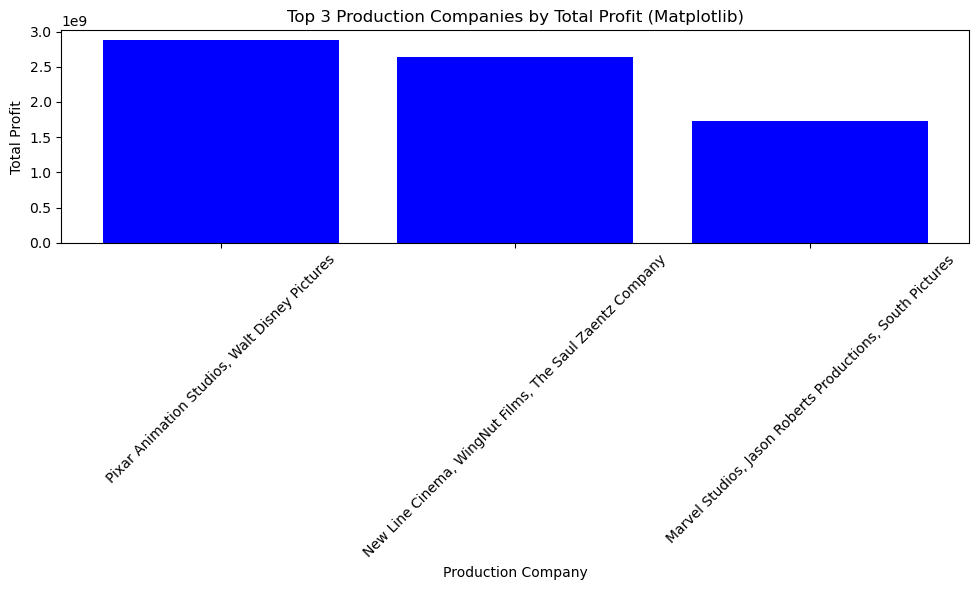

In [99]:
# Create a bar plot comparing the Total Profit for the top 3 production companies using matplotlib
plt.figure(figsize=(10, 6))
plt.bar(top_3_total_profit['Production company'], top_3_total_profit['Total Profit'], color='blue')
plt.xlabel('Production Company')
plt.ylabel('Total Profit')
plt.title('Top 3 Production Companies by Total Profit (Matplotlib)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

seaborn
plt.figure(figsize=10,6))
sns.barplot(x='',y='', data, color='skyblue')
plt.xlabel()
plt.ylabel()
plt.title()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
plt.bar
plt.xlabel
plt.ylabel
plt.title
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


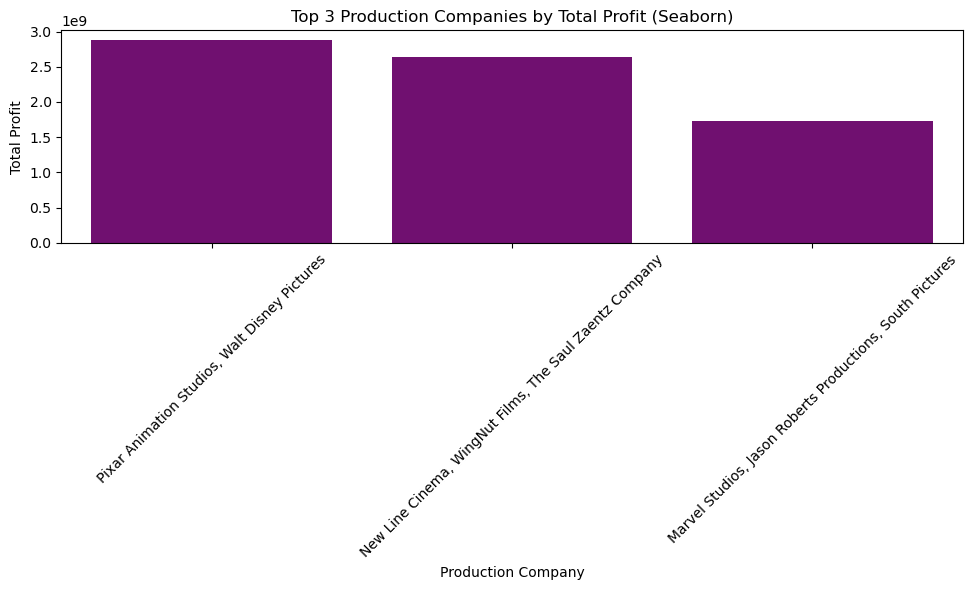

In [100]:
# Create a bar plot comparing the Total Profit for the top 3 production companies using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Production company', y='Total Profit', data=top_3_total_profit, color='purple')
plt.xlabel('Production Company')
plt.ylabel('Total Profit')
plt.title('Top 3 Production Companies by Total Profit (Seaborn)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()